(205, 205, 3)


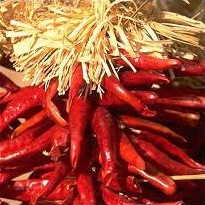

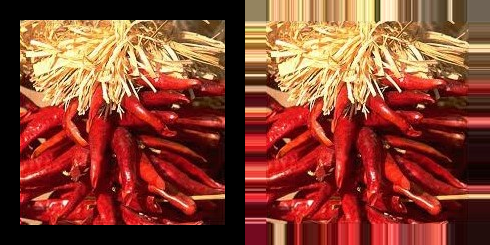

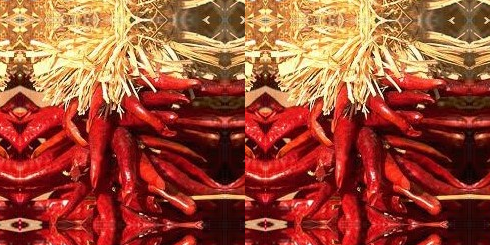

In [ ]:
# Please upload chilli_img for performing operation
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img_path = "/content/chilli_img.jpg"
img = cv2.imread(img_path)
print(img.shape)
cv2_imshow(img)

## Now image padding  for filtering can be of 3 types:
# 1. Same : Nothing to be done on image.
# 2. Valid : using numpy, simply slice image to respective indices:
# for example, if filter is of size 3*3, 
# remove 1 row from top and bottom and 1 column from left and right.
# 3. Full : In this case, border needs to be extended. 
# In openCV, it can be done using cv2.copyMakeBorder() method
# for cv2.copyMakeBorder, parameters are :
# src => source image
# top, bottom, left, right => 0.5 * size of image. Here 4 is just random number
# here size of image is 450, so top = bottom = left = right = 225
# borderType : types of border extension.
# BORDER_CONSTANT => adds a constant colored border
# BORDER_REFLECT => mirror reflection of the border elements 
#                   "gfedcba|abcdefg|gfedcba"
# BORDER_DEFAULT => same works as BORDER_REFLECT but with slight change.
#                   “gfedcb|abcdefgh|gfedcba"
# BORDER_REPLICATE => replicates the last element
#                   "aaaaa|abcdefgh|hhhhh"
top = bottom = left = right = 20
img_1 = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT)
img_2 = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REFLECT)
img_3 = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_DEFAULT)
img_4 = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REPLICATE)

Hori = np.concatenate((img_1, img_4), axis=1)
cv2_imshow(Hori)

Hori = np.concatenate((img_2, img_3), axis=1)
cv2_imshow(Hori)

(283, 283, 3)


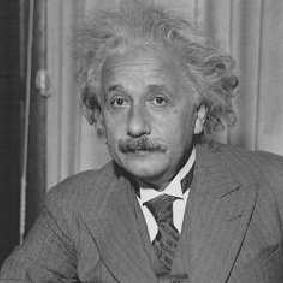

(283, 283)


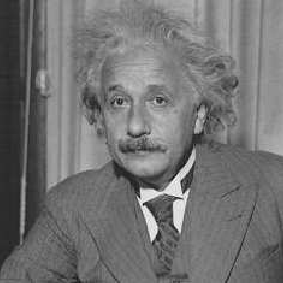

Impulse Filter


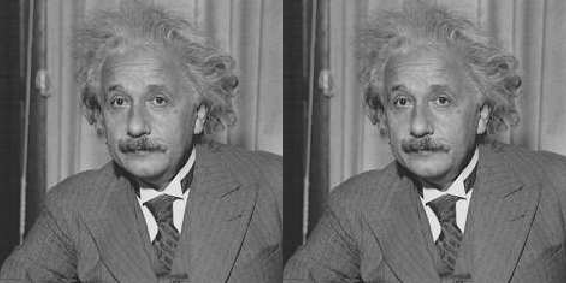

Shift Filter


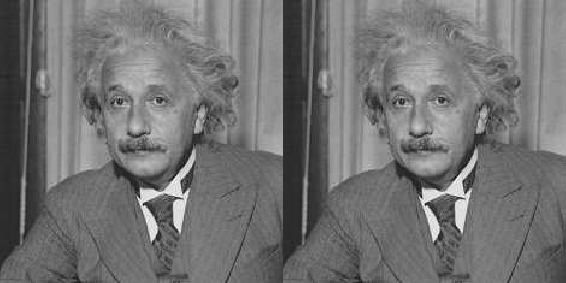

Blur Filter


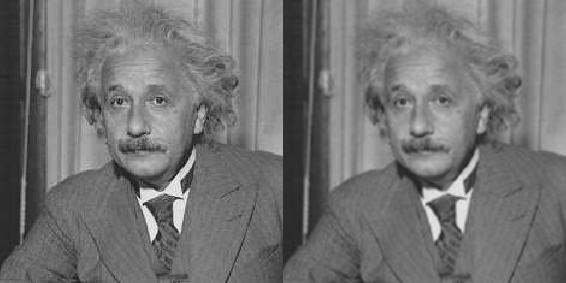

Sharp Filter


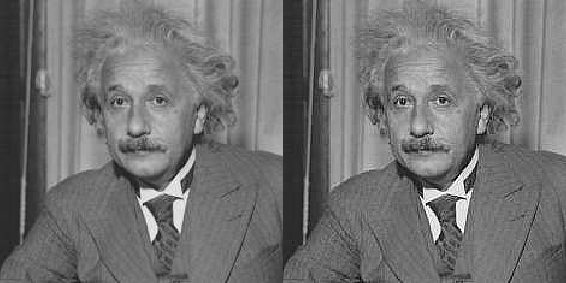

In [11]:
# Please upload einstein test image for performing operation
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img_path = "/content/Einstein_test_image.png"
img = cv2.imread(img_path)
print(img.shape)
cv2_imshow(img)
## convert 3 layers to 1 for image:
img_new = img[:,:,0]
print(img_new.shape)
cv2_imshow(img_new)

## Different kernels applied to filter
# impulse filter:
impulse_filter = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

img_impulse = cv2.filter2D(img_new, -1, impulse_filter)
print("Impulse Filter")
Hori = np.concatenate((img_new, img_impulse), axis=1)
cv2_imshow(Hori)

# Shited image by 1 pixel
shift_filter = np.array([[0, 0, 0],
                    [0, 0, 1],
                    [0, 0, 0]])
img_shift = cv2.filter2D(img_new, -1, shift_filter)
print("Shift Filter")
Hori = np.concatenate((img_new, img_shift), axis=1)
cv2_imshow(Hori)

# Blurred filter
blur_filter = np.array([[1/9., 1/9., 1/9.],
                    [1/9., 1/9., 1/9.],
                    [1/9., 1/9., 1/9.]])
img_blur = cv2.filter2D(img_new, -1, blur_filter)
print("Blur Filter")
Hori = np.concatenate((img_new, img_blur), axis=1)
cv2_imshow(Hori)

# Sharpning Image using 2 different kernel
sharp_filter =  np.array([[0, 0, 0],
                    [0, 2, 0],
                    [0, 0, 0]]) -  np.array([[1/9., 1/9., 1/9.],
                    [1/9., 1/9., 1/9.],
                    [1/9., 1/9., 1/9.]])
img_sharp = cv2.filter2D(img_new, -1, sharp_filter)
print("Sharp Filter")
Hori = np.concatenate((img_new, img_sharp), axis=1)
cv2_imshow(Hori)

(512, 512)


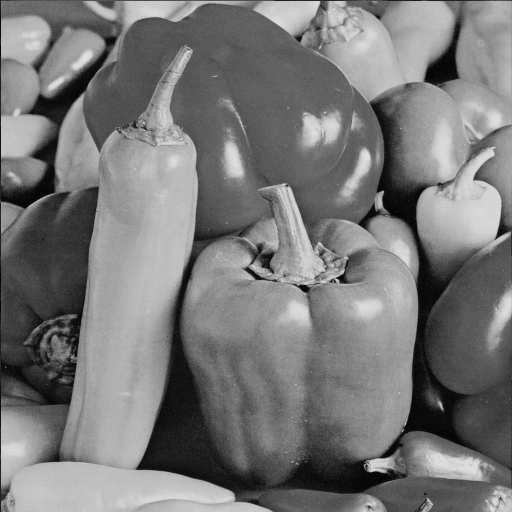

Gaussian Noise


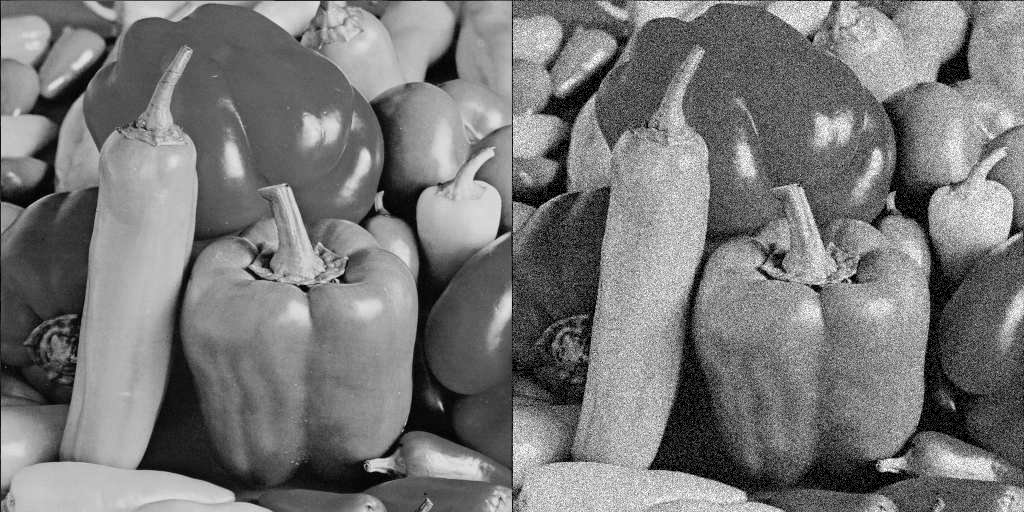

Salt and pepper Noise


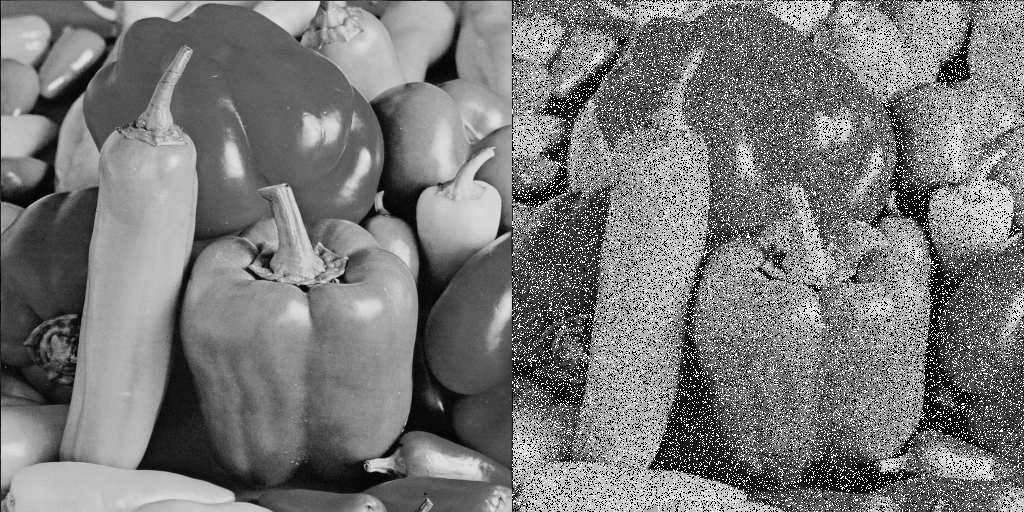

Median filter applied for Salt and pepper Noise


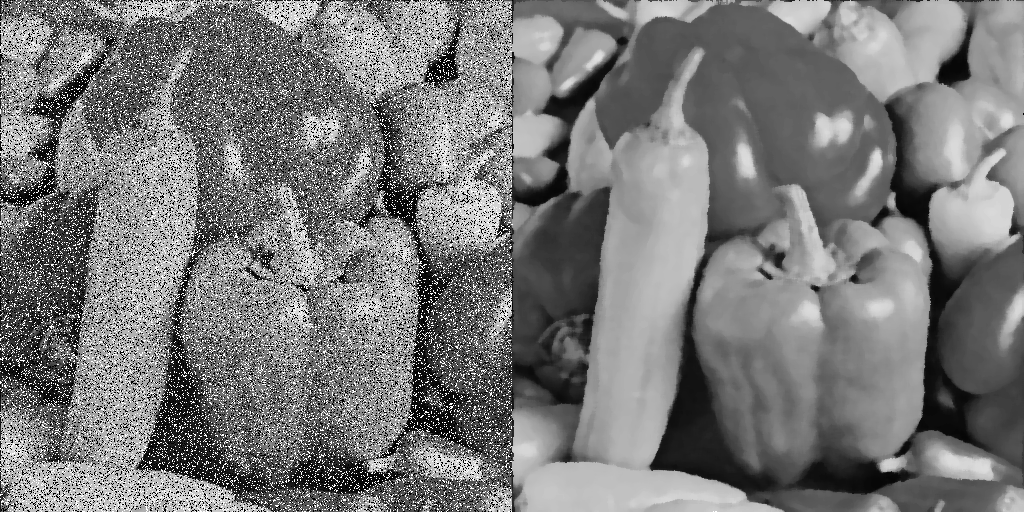

Median filter applied for Salt and pepper Noise


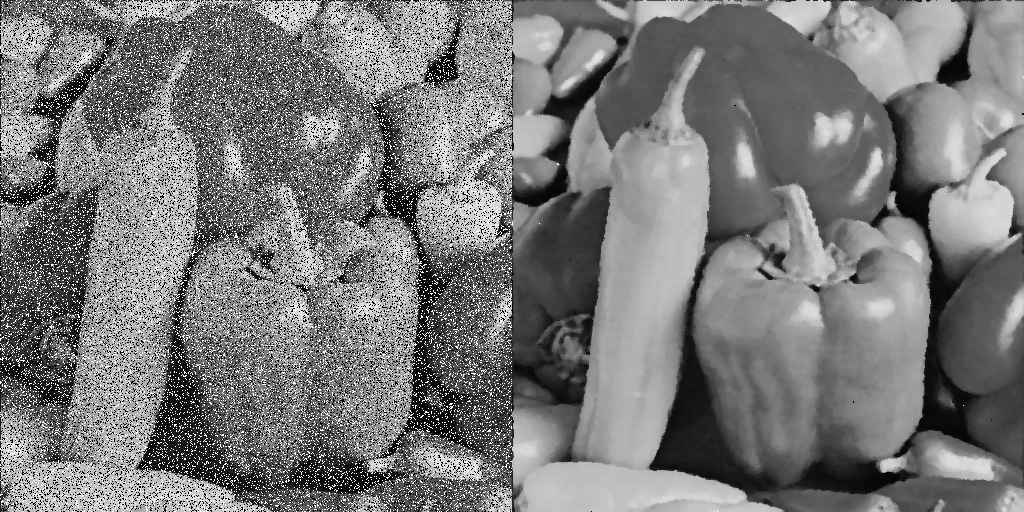

In [20]:
## Please upload pepper_image for performing operation

## References:
# https://theailearner.com/2019/05/07/add-different-noise-to-an-image/

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from skimage.util import random_noise

img_path = "/content/pepper_image.jpg"
## convert 3 layers to 1 for image:
img_new = img[:,:,0]
print(img_new.shape)
cv2_imshow(img_new)

## Gaussian noise
gau_noise = random_noise(img_new,mode="gaussian")
img_gau = np.array(255*gau_noise, dtype = 'uint8')
print("Gaussian Noise")
Hori = np.concatenate((img_new, img_gau), axis=1)
cv2_imshow(Hori)

## Salt and Pepper noise
snp_noise = random_noise(img_new,mode="s&p",amount=0.3)
img_snp = np.array(255*snp_noise, dtype = 'uint8')
print("Salt and pepper Noise")
Hori = np.concatenate((img_new, img_snp), axis=1)
cv2_imshow(Hori)

## Apply median  filter to salt and pepper noise image
filter_img = cv2.medianBlur(img_snp, 7)
print("Median filter applied for Salt and pepper Noise")
Hori = np.concatenate((img_snp,filter_img), axis=1)
cv2_imshow(Hori)

## Apply median  filter to salt and pepper noise image
filter_img = cv2.medianBlur(img_snp, 5)
print("Median filter applied for Salt and pepper Noise")
Hori = np.concatenate((img_snp,filter_img), axis=1)
cv2_imshow(Hori)
